# Exploratory Data Analysis of Sales.csv

## 1) Loading the libraries and the dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici
from dython.nominal import associations
import numpy as np

In [16]:
# read the data
sales = pd.read_csv('Cleaned_Data/sales.csv')

# dataset to merge
cars = pd.read_csv('Cleaned_Data/cars.csv')
users = pd.read_csv('Cleaned_Data/users.csv')

## 2) Preparing the data

In [17]:
# merge the cars
sales = pd.merge(sales, cars, on='car_id', how='left')

# merge the users
sales = pd.merge(sales, users, on='customer_id', how='left')

In [18]:
# check duplicates
print('Duplicates:', sales.duplicated().sum())

Duplicates: 0


In [19]:
# reset the index
sales.reset_index(drop=True, inplace=True)

In [20]:
# nans
sales.isnull().sum()

transaction_id         0
customer_id            0
car_id                 0
platform               0
purchase_date          0
purchase_price         0
user_review        65070
car_model              0
fuel_type              0
release_date           0
price                  0
user_first_name       21
user_last_name        11
gender                 0
email                 14
dtype: int64

### 2.1) Associations

In [21]:
# copy the dataset
sales_dython = sales.copy()

In [22]:
# print all the column that have id in the name
id_columns = [col for col in sales_dython.columns if '_id' in col]
print("We are dropping the following columns:", id_columns)

# drop the id columns
sales_dython.drop(columns=id_columns, inplace=True)

We are dropping the following columns: ['transaction_id', 'customer_id', 'car_id']


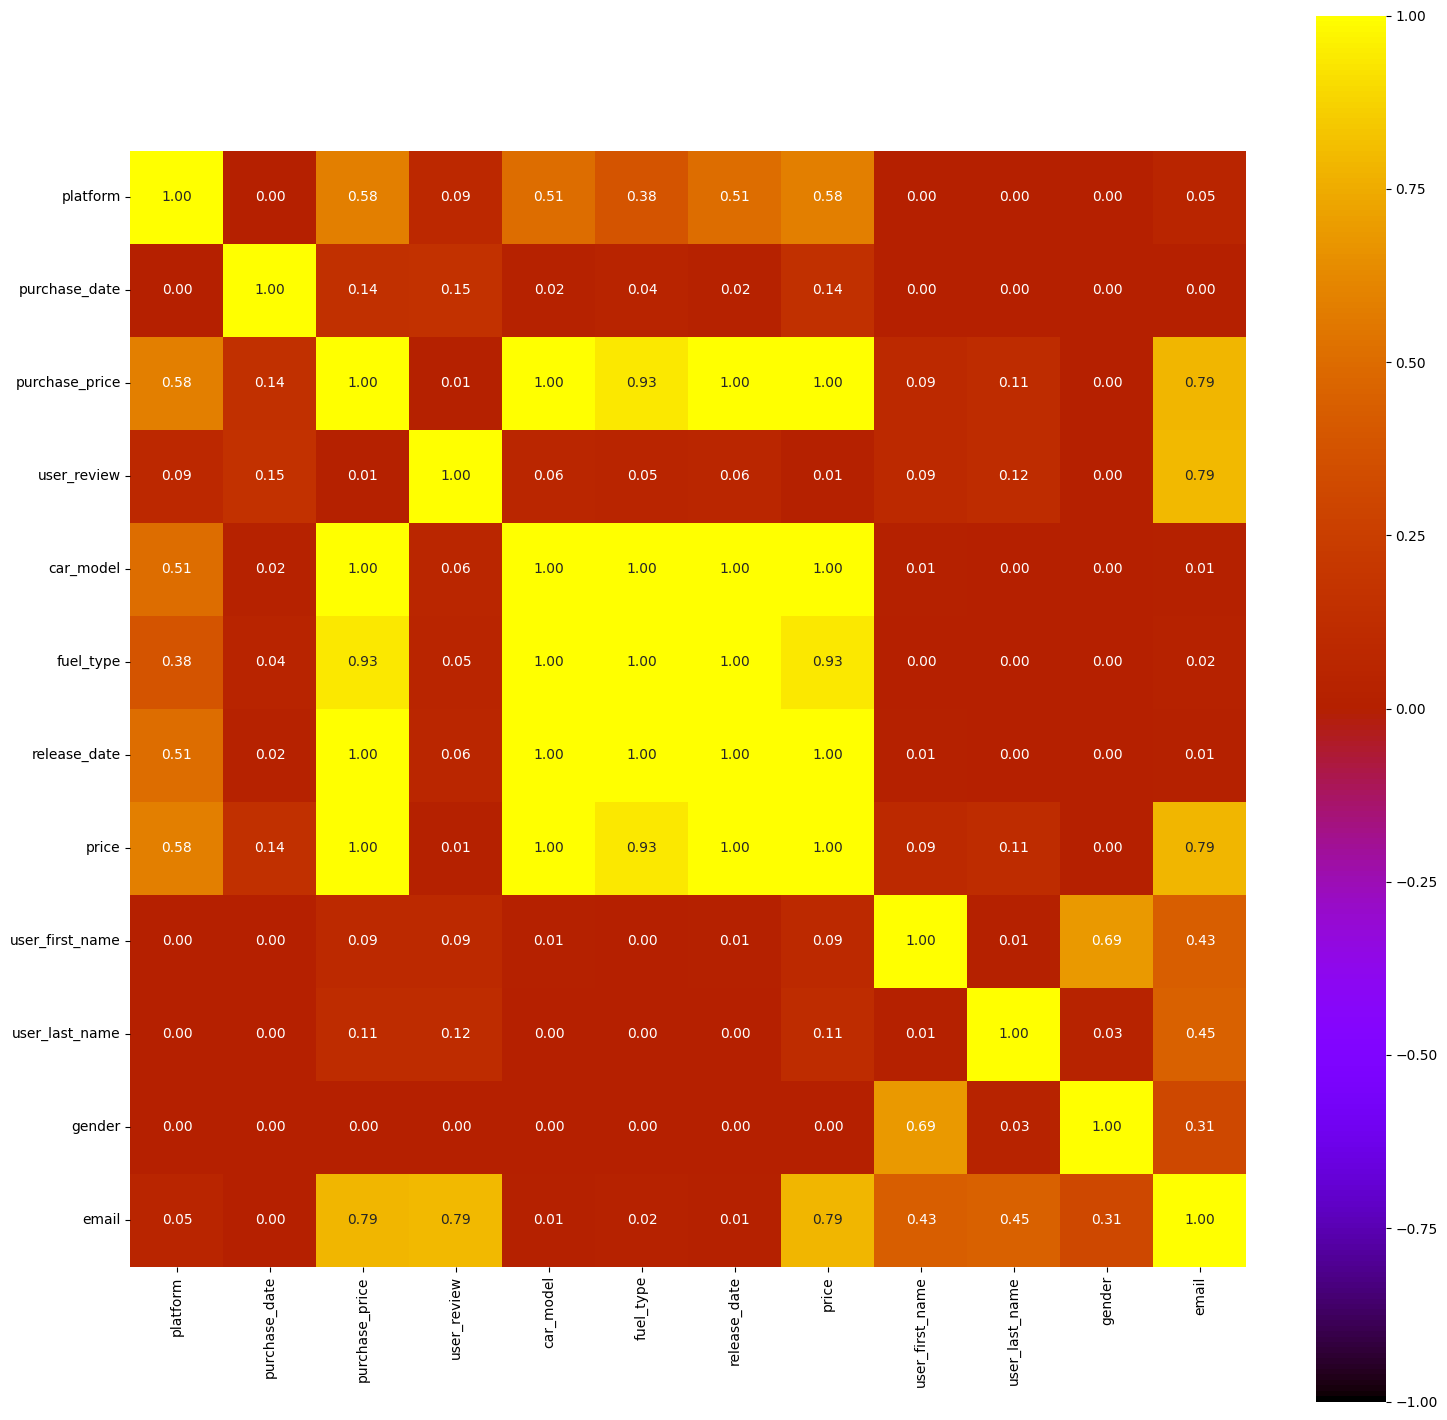

In [23]:
# Generate the correlation matrix
associations_sales = associations(sales_dython, multiprocessing=True, cmap='gnuplot',num_num_assoc='spearman')

In [24]:
# we can fill the nans of user_review with -1
sales['user_review'] = sales['user_review'].fillna(-1)

In [25]:
# shape
sales.shape

(74780, 15)

In [26]:
# drop nan
sales.dropna(inplace=True)

In [27]:
sales.dtypes

transaction_id      object
customer_id         object
car_id              object
platform            object
purchase_date       object
purchase_price     float64
user_review        float64
car_model           object
fuel_type           object
release_date        object
price                int64
user_first_name     object
user_last_name      object
gender              object
email               object
dtype: object